# Use  [siphon](https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html#sphx-glr-examples-upperair-wyoming-request-py) to check whether [Wyoming Upper Air sounding](https://weather.uwyo.edu/upperair/sounding.html) data exists on specified dates


Sounding data interface:
https://weather.uwyo.edu/upperair/sounding.html

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 12})
import xarray as xr
import pandas as pd
from datetime import datetime
from datetime import timedelta

# meteorology - specific
# from metpy.calc import relative_humidity_from_dewpoint
# from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir

import sys
sys.path.append('./scripts/')

from LIB_dates import generate_date_list
from LIB_request_WUA_sounding import check_for_WUA_soundings

### Create list of dates to check

In [ ]:
#===============================
# initial date
date_i = datetime(2022, 6, 1, 0)
# final date
date_f = datetime(2022, 6, 30, 23)
# time step in hours
hourly = 1
#===============================

# homemade function
# use help(generate_date_list) for details
dates = generate_date_list(date_i = date_i, date_f = date_f, hourly = hourly, suppress_prints = False)

### Use siphon to check whether sounding data exists on given dates
save dates to pandas data frame with sounding_exist == 1 when data exists and sounding_exist == 0 when no data found

In [ ]:
# homemade function
# use help(check_for_WUA_soundings) for details
df = check_for_WUA_soundings(date_list = dates, station = 'PABR')
df

### Save list of dates to dataframe for later reference
save dates to pandas data frame with sounding_exist == 1 when data exists and sounding_exist == 0 when no data found

In [ ]:
date_f.strftime('%Y%m%dZ%hh')

In [7]:
# create name of csv file from date range
date_i_string = date_i.strftime('%Y%m%dZ%hh')
date_f_string = date_f.strftime('%Y%m%dZ%hh')
save_name = f'./sounding_checks/checked_{date_i_string}_{date_f_string}_hourly{hourly}.csv'

# save file
# df.to_csv(path_or_buf='sou_che_2023_06.csv', index=None)
print(f' >>> saving file as {save_name}')

In [8]:
pd.read_csv('sou_che_2023_06.csv')

,date,sounding_exist
0,2022-06-01,1
1,2022-06-02,1
2,2022-06-03,1
3,2022-06-04,1
4,2022-06-05,1
5,2022-06-06,1
6,2022-06-07,1
7,2022-06-08,1
8,2022-06-09,1
9,2022-06-10,1


### No data available:

June 2022


date_i = datetime(2022, 7, 1, 0)
date_f = datetime(2022, 7, 15, 0)
hourly = 1

With data:
[datetime.datetime(2022, 7, 1, 0, 0)]


date_i = datetime(2022, 7, 15, 0)
date_f = datetime(2022, 7, 31, 23)
hourly = 1
With data:
[datetime.datetime(2022, 7, 15, 18, 0),
 datetime.datetime(2022, 7, 16, 0, 0),
 datetime.datetime(2022, 7, 16, 6, 0),
 datetime.datetime(2022, 7, 16, 12, 0),
 datetime.datetime(2022, 7, 16, 18, 0),
 datetime.datetime(2022, 7, 17, 0, 0),
 datetime.datetime(2022, 7, 17, 6, 0),
 datetime.datetime(2022, 7, 17, 12, 0),
 datetime.datetime(2022, 7, 17, 18, 0),
 datetime.datetime(2022, 7, 18, 0, 0),
 datetime.datetime(2022, 7, 18, 6, 0),
 datetime.datetime(2022, 7, 18, 12, 0),
 datetime.datetime(2022, 7, 18, 18, 0),
 datetime.datetime(2022, 7, 19, 0, 0)]

In [25]:

#==========================
variable = RH
heights = H
bin_width = 0.25
min_height = 0
max_height = 12

# method = 'mean'
method = 'max'

show_plots = False
print_progress = False
#==========================


assert method in ['mean', 'max'], f"method should be one of 'mean', 'max', not {method}"

# create bin edges and centers
bin_edges = np.arange(min_height,max_height+bin_width,bin_width)
bin_centers = (bin_edges+bin_width/2)[:-1]*units.kilometer
binned_var = np.array([])

if show_plots == True:
    fig, ax = plt.subplots(figsize=(1, 7)) 
    ax.scatter(np.zeros_like(bin_edges), bin_edges, marker='_', c='k', label='edge')
    ax.scatter(np.zeros_like(bin_centers), bin_centers, marker='.', c='k', label='denter')
    ax.set_xticks([]);
    plt.legend();
    ax.set_ylabel('height (km)')

# run through and average data within bins
# that contain data
for i, bin_i in enumerate(bin_centers):
    
    # find edges of bin
    h_min = bin_edges[i]
    h_max = bin_edges[i+1]
    
    # find indices of data points within bin
    h_index = (heights.magnitude>h_min) & (heights.magnitude<=h_max)
    
    # find data of points in bin
    var_in_bin = variable[h_index]
    
    # take mean of data values 
    if len(var_in_bin)==0:
        mean_var = np.nan
    elif len(var_in_bin)==1:
        mean_var = var_in_bin
    else:
        if str(method) == 'mean':
            mean_var = np.mean(var_in_bin)
        elif str(method) == 'max':
            mean_var = np.max(var_in_bin)
        
    # save to binned variable array
    binned_var = np.append(binned_var, mean_var)
    
# check that first and last bin are not nans    
assert np.isnan(binned_var.magnitude[0]) == False, f'missing data in lowest bin: {bin_edges[0]} - {bin_edges[1]} km'
assert np.isnan(binned_var.magnitude[-1]) == False, f'missing data in highest bin: {bin_edges[-2]} - {bin_edges[-1]} km'


# duplicate list to start filling in nans
new_binned_var = binned_var

# now interpolate data in bins without data
# linearly interpolate with height across nearest heights with data
if print_progress == True:
    print('>>> Search for empty bins to interpolate data with height\n')
for i, bin_i in enumerate(bin_centers):
    
    # identify empty bin
    if np.isnan(binned_var[i]):
        
        current_height = bin_centers[i]
        
        if print_progress == True:
            print(f'bin {i}: {bin_centers[i]}, {binned_var[i]:.1f}')
        
        # find nearest non-nan data
        #--------------------------
        # search for nearest lower-height bin with data
        for iii in range(i)[::-1]:

            # identify non-empty bin and grab its height/data
            if np.isnan(binned_var[iii]) == False:
                low_height = bin_centers[iii]
                low_value  = binned_var[iii]
                if print_progress == True:
                    print(f' - lower height: {low_height}, {low_value:.1f}')
                break
                
        # search for nearest higher-height bin with data
        for iii in range(i, len(bin_centers)):

            # identify non-empty bin and grab its height/data
            if np.isnan(binned_var[iii]) == False:
                high_height = bin_centers[iii]
                high_value  = binned_var[iii]
                if print_progress == True:
                    print(f' - higher height: {high_height}, {high_value:.1f}')
                break
                
        # Interpolate
        #------------
        # change in variable over non-nan height
        Dvar = high_value - low_value
        # non-nan height change
        Dh = high_height - low_height
        # height change to nan value
        dh = current_height - low_height
        # linearly inerpolate variable to new height
        interp_var = low_value + (Dvar/Dh)*(dh)
        
        if print_progress == True:
            print(f'   > dvar/dh = {Dvar/Dh:.1f} over {dh}')
            print(f'   > var ~= {interp_var:.1f}')
            print('')
            
        # replace nan with interpolated value
        new_binned_var[i] = interp_var
        



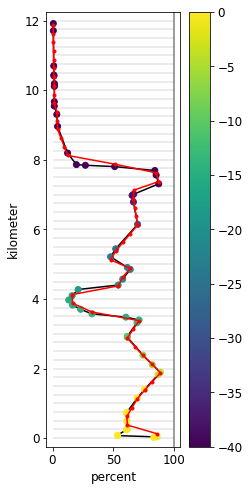

In [23]:
fig, ax = plt.subplots(figsize=(3, 8))
ax.plot(RH, H, c='k', zorder=0)
temp = ax.scatter(RH, H, c=T, vmin=-40, vmax = 0, zorder=1)
plt.colorbar(temp)

RH_thresh = 100
ax.vlines(RH_thresh,-1,20, colors='k', alpha=0.5, zorder=-1)

plt.xlim(-5,105)
plt.ylim(-0.25,12.25)


for edge in bin_edges:
    ax.hlines(edge,0, 100, colors='k', alpha=0.1, zorder=-1)
    
    
ax.plot(binned_var, bin_centers, c='r', marker='.', zorder=1)



#### Reading in locally-stored University of Wyoming sounding data

In [5]:
# #========================================
# # number of data columns
# num_cols = 11

# # path to sounding file
# sound_txt = "./sound_jun.txt"

# # row where data starts (0 is first)
# row_ds = 5
# #========================================

# read_in_data = np.array([])

# # open text file
# with open(sound_txt) as file:
    
#     # run through all file rows
#     for ii, item in enumerate(file):
#         print(item)
        
#         # save data if after header rows
#         if ii >= row_ds:
            
#             # split data by spaces and save as floats
            
#             data_columns = [float(x) for x in item.split('\n')[0].split(' ') if x != '']
            
#             # save data if has length num_columns
#             # (don't save on pressure levels where not all variables are present)
#             if len(data_columns) == num_cols:
#                 read_in_data = np.append(read_in_data, data_columns)
            
# # reshape into array
# sounding_data = np.reshape(read_in_data, (int(len(read_in_data)/num_cols), num_cols))        